## Clustering

In [5]:
from sklearn.cluster import KMeans

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
df = pd.DataFrame(columns=('x','y'))
df.loc[0] = [7,1]
df.loc[1] = [2,1]
df.loc[2] = [4,2]
df.loc[3] = [9,4]
df.loc[4] = [10,5]
df.loc[5] = [10,6]
df.loc[6] = [11,5]
df.loc[7] = [11,6]
df.loc[8] = [15,3]
df.loc[9] = [15,2]
df.loc[10] = [16,6]
df.loc[11] = [16,1]

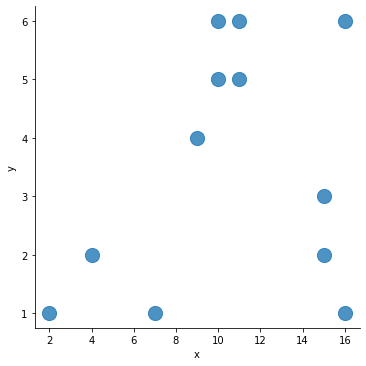

In [14]:
sns.lmplot('x','y',data=df,fit_reg=False,scatter_kws={'s':200})

In [15]:
data_points = df.values
data_points

array([[7, 1],
       [2, 1],
       [4, 2],
       [9, 4],
       [10, 5],
       [10, 6],
       [11, 5],
       [11, 6],
       [15, 3],
       [15, 2],
       [16, 6],
       [16, 1]], dtype=object)

In [18]:
kmeans = KMeans(n_clusters=3).fit(data_points)
kmeans.labels_ # 각각의 데이터에 라벨을 부여

array([2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0])

In [19]:
df['clu_id'] = kmeans.labels_
df

,x,y,clu_id
0,7,1,2
1,2,1,2
2,4,2,2
3,9,4,1
4,10,5,1
5,10,6,1
6,11,5,1
7,11,6,1
8,15,3,0
9,15,2,0


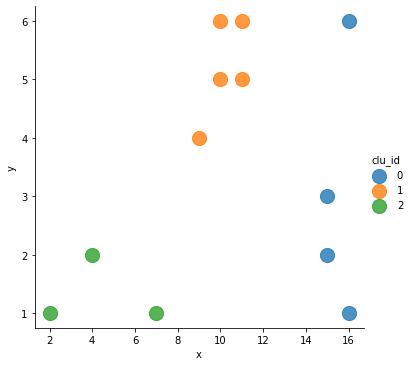

In [21]:
# visualization data point
sns.lmplot('x','y',data=df,fit_reg=False,scatter_kws={'s':200},hue='clu_id')

In [22]:
# 분류용 가상 데이터 생성
# make_blobs() : 등방성 가우시안 정규분포 - 방향이 같은 성질의 데이터 생성,,?
# n_samples : 표본수
# n_features : 독립변수의 수
# cender : 클러스터의 수

In [24]:
from sklearn.datasets import make_blobs

<function matplotlib.pyplot.show(close=None, block=None)>

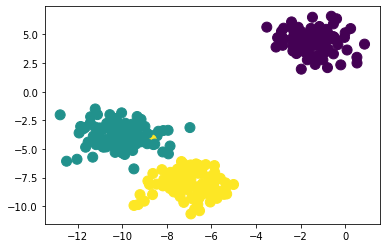

In [28]:
X, y = make_blobs(n_samples=300,n_features=2,centers=3, random_state=1)
# 300개의 표본을 같은 성질을 가진 데이터를 만들어줌
# X -> 2개의 feature들의 값
# y -> label의 값

plt.scatter(X[:,0],X[:,1],marker='o',c=y,s=100)
plt.show

In [29]:
feature, label = make_blobs(random_state=1)

In [30]:
clu_mean = KMeans(n_clusters=3)
clu_mean.fit(feature)

KMeans(n_clusters=3)

In [31]:
clu_mean.labels_

array([0, 2, 2, 2, 1, 1, 1, 2, 0, 0, 2, 2, 1, 0, 1, 1, 1, 0, 2, 2, 1, 2,
       1, 0, 2, 1, 1, 0, 0, 1, 0, 0, 1, 0, 2, 1, 2, 2, 2, 1, 1, 2, 0, 2,
       2, 1, 0, 0, 0, 0, 2, 1, 1, 1, 0, 1, 2, 2, 0, 0, 2, 1, 1, 2, 2, 1,
       0, 1, 0, 2, 2, 2, 1, 0, 0, 2, 1, 1, 0, 2, 0, 2, 2, 1, 0, 0, 0, 0,
       2, 0, 1, 0, 0, 2, 2, 1, 1, 0, 1, 0])

In [32]:
clu_mean.predict(feature) # 예측

array([0, 2, 2, 2, 1, 1, 1, 2, 0, 0, 2, 2, 1, 0, 1, 1, 1, 0, 2, 2, 1, 2,
       1, 0, 2, 1, 1, 0, 0, 1, 0, 0, 1, 0, 2, 1, 2, 2, 2, 1, 1, 2, 0, 2,
       2, 1, 0, 0, 0, 0, 2, 1, 1, 1, 0, 1, 2, 2, 0, 0, 2, 1, 1, 2, 2, 1,
       0, 1, 0, 2, 2, 2, 1, 0, 0, 2, 1, 1, 0, 2, 0, 2, 2, 1, 0, 0, 0, 0,
       2, 0, 1, 0, 0, 2, 2, 1, 1, 0, 1, 0])

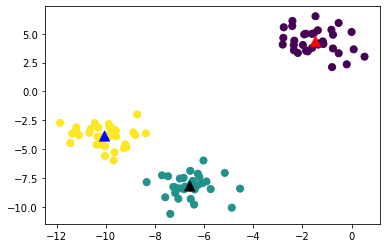

In [44]:
plt.scatter(feature[:,0],feature[:,1],
           c = clu_mean.labels_,
           marker='o',
           s=50)

plt.scatter(clu_mean.cluster_centers_[:,0],clu_mean.cluster_centers_[:,1],
           c=['r','k','b'],
           marker='^',
           s=100)

plt.show()

In [42]:
clu_mean.cluster_centers_

array([[ -1.4710815 ,   4.33721882],
       [ -6.58196786,  -8.17239339],
       [-10.04935243,  -3.85954095]])

## K-Means Clustering

In [45]:
from sklearn.datasets import load_iris

In [47]:
iris = load_iris()

In [57]:
iris_df = pd.DataFrame(data=iris.data,columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


- Kmeans 객체 생성하고 군집화 수행

In [63]:
iris_kmeans = KMeans(n_clusters=3,random_state=0,max_iter=300,init='k-means++').fit(iris_df)
iris_kmeans.labels_ # 각각의 데이터에 라벨을 부여

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [64]:
iris_kmeans.predict(iris_df)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [66]:
# 포인트 별 할당된 그룹을 열로 추가하기
iris_df['clu_id'] = iris_kmeans.labels_
iris_df['target'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clu_id,target
0,5.1,3.5,1.4,0.2,1,0
1,4.9,3.0,1.4,0.2,1,0
2,4.7,3.2,1.3,0.2,1,0
3,4.6,3.1,1.5,0.2,1,0
4,5.0,3.6,1.4,0.2,1,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,2
146,6.3,2.5,5.0,1.9,2,2
147,6.5,3.0,5.2,2.0,0,2
148,6.2,3.4,5.4,2.3,0,2


In [68]:
# 그룹을 (target ,clu_id) 통한 sepal_length

iris_group_cnt = iris_df.groupby(['target','clu_id'])['sepal length (cm)'].count()
iris_group_cnt

target  clu_id
0       1         50
1       0          2
        2         48
2       0         36
        2         14
Name: sepal length (cm), dtype: int64

In [69]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [94]:
# 2차원 평면에 데이터 포인트별로 군집화된 결과를 시각화
# 차원축소
# 주성분 분석
from sklearn.decomposition import PCA

iris_pca = PCA(n_components=2)
iris_pca_transform = iris_pca.fit_transform(iris.data)


iris_df['pca_x'] = iris_pca_transform[:,0]
iris_df['pca_y'] = iris_pca_transform[:,1]
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clu_id,target,pca_x,pca_y
0,5.1,3.5,1.4,0.2,1,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,1,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,1,0,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,1,0,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,1,0,-2.728717,0.326755


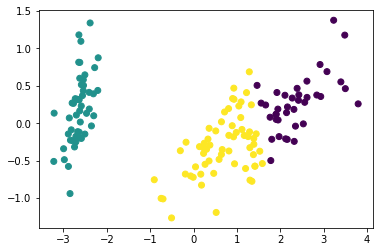

In [95]:
plt.scatter(x=iris_df['pca_x'],y=iris_df['pca_y'],c=iris_df['clu_id'])
plt.show()

In [96]:
# 표준화를 통한 차원 축소 및 시각화
from sklearn.preprocessing import StandardScaler

# 타겟을 제외한 피쳐만 추출하여 표준화 작업을 진행 
# 주성분 분석을 하기전에 데이터를 표준화 

scaler=StandardScaler().fit_transform(iris_df.iloc[:,:4])
scaler_df = pd.DataFrame(scaler)
scaler_df


,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [97]:
iris_pca = PCA(n_components =2)
iris_pca_transform =pca.fit(scaler).transform(scaler_df)
iris_df['sts_pca_x'] = iris_pca_transform[:,0]
iris_df['sts_pca_y'] = iris_pca_transform[:,1]
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clu_id,target,pca_x,pca_y,sts_pca_x,sts_pca_y
0,5.1,3.5,1.4,0.2,1,0,-2.684126,0.319397,-2.264703,0.480027
1,4.9,3.0,1.4,0.2,1,0,-2.714142,-0.177001,-2.080961,-0.674134
2,4.7,3.2,1.3,0.2,1,0,-2.888991,-0.144949,-2.364229,-0.341908
3,4.6,3.1,1.5,0.2,1,0,-2.745343,-0.318299,-2.299384,-0.597395
4,5.0,3.6,1.4,0.2,1,0,-2.728717,0.326755,-2.389842,0.646835


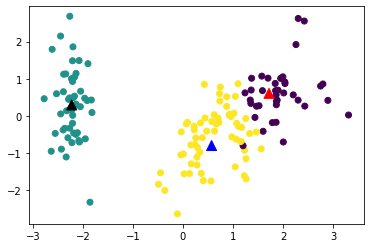

In [100]:
iris_clu_mean = KMeans(n_clusters=3)
iris_clu_mean.fit(iris_df.iloc[:,-2:])
plt.scatter(x=iris_df['sts_pca_x'],y=iris_df['sts_pca_y'],c=iris_df['clu_id'])
plt.scatter(iris_clu_mean.cluster_centers_[:,0],
           iris_clu_mean.cluster_centers_[:,1],
           c=['r','k','b'],marker='^',s=100)

plt.show()

- PCA(차원축소) : Princial component Analysis
- 데이터의 피처를 압축(테이블 매트릭스의 차원을 낮추는 작업)
- 예) 온도 습도 강수량 미세먼지 풍속 태풍여부 ..... 교통량 유동인구
- 습도와 강수량은 양의 상관관계로 이 둘은 밀접한 연관성이 있다고 볼 수 있다.
- 이렇게 연관성이 있는 피쳐들을 하나로 합쳐주는 작업이 주성분분석

In [72]:
pca_iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
pca_iris_df['target'] = iris.target
pca_iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Text(0, 0.5, 'sepal width')

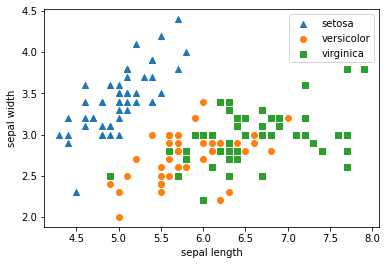

In [75]:
#  각 타겟별 데이터 분포 확인

markers =['^','o','s']
for i, marker in enumerate(markers):
    # print(i,marker)
    x_data_point = pca_iris_df[pca_iris_df['target']==i]['sepal length (cm)']
    y_data_point = pca_iris_df[pca_iris_df['target']==i]['sepal width (cm)']
    # print(x_data_point,y_data_point)
    plt.scatter(x_data_point,y_data_point,marker=marker , label=iris.target_names[i])
plt.legend()

plt.xlabel('sepal length')
plt.ylabel('sepal width')

In [81]:
# 컬럼에 대한 데이터 표준화
# 표준화 하는 이유 -> 데이터의 스케일에 따라 주성분의 설명 가능한 분산량이 달라질 수 있기 때문

from sklearn.preprocessing import StandardScaler

# 타겟을 제외한 피쳐만 추출하여 표준화 작업을 진행 
# 주성분 분석을 하기전에 데이터를 표준화 

scaler=StandardScaler().fit_transform(pca_iris_df.iloc[:,:4])
pca_iris_scaler_df = pd.DataFrame(scaler)
pca_iris_scaler_df


,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [88]:
# 주성분 분석
from sklearn.decomposition import PCA

pca = PCA(n_components =2)
iris_pca =pca.fit(scaler).transform(scaler)
iris_pca_df = pd.DataFrame(iris_pca,columns=['pca01','pca02'])
iris_pca_df['target'] = iris.target
iris_pca_df.head()

,pca01,pca02,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


Text(0, 0.5, 'pca02')

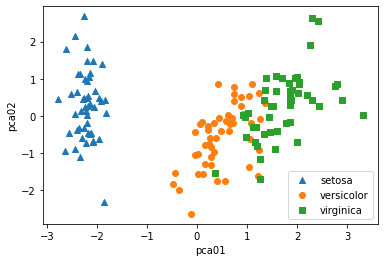

In [92]:
# 표준화 후 

markers =['^','o','s']
for i, marker in enumerate(markers):
    # print(i,marker)
    x_data_point = iris_pca_df[iris_pca_df['target']==i]['pca01']
    y_data_point = iris_pca_df[iris_pca_df['target']==i]['pca02']
    # print(x_data_point,y_data_point)
    plt.scatter(x_data_point,y_data_point,marker=marker , label=iris.target_names[i])
plt.legend()

plt.xlabel('pca01')
plt.ylabel('pca02')